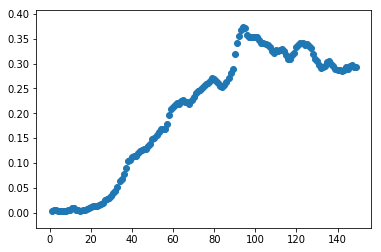

In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
# load data
r_data = pd.read_csv("../result/join_weather_flower/Anthurium_C0V360_內門.csv")
r_data = r_data.dropna()
gb_df  = r_data.groupby("year")
r_data = gb_df.get_group(2015.0)
# print(r_data)
r_data = r_data.reset_index()
r_data = r_data.drop(columns="index")

# select year

# r_data
# r_data
# remove "/" or not double data
col_x = ['Temperature', 'T.Max', 'T.Min', 'Precp', 'RH', 'StnPres', 'WS', 'WSGust']
# col_x = ['Temperature', 'T.Max', 'T.Min', 'Precp', 'RH']
for col in col_x:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new
# Normalize data
# col_x = ['Temperature', 'T.Max', 'T.Min', 'Precp', 'RH', 'StnPres', 'WS', 'WSGust']
x_data = r_data[col_x]
x = (x_data - x_data.mean()) / (x_data.std())
y = r_data["avg_price"]
# shift
result = []
n = 150
for s_d in range(1,n):
    x_new = np.array(x.drop(index=list(range(s_d)),axis=0))
    y_new = y[:-s_d]
#     print(len(x_new), len(y_new))
#     print(s_d)
    model = sm.regression.linear_model.OLS(y_new, x_new)
    result.append(model.fit().rsquared)
#     print(s_d,"\t", result.rsquared)
matplotlib.pyplot.scatter(range(1,n),result)

1711 1711
